In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import statsmodels.api as sm

In [3]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/체질검사.csv", encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [10]:
df_raw[['WEIGHT','WEIGHT_UNIT']]=df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT','HEIGHT_UNIT']]=df_raw['HEIGHT'].str.split(expand=True)
df_raw['WEIGHT']=df_raw["WEIGHT"].astype('float64')
df_raw['HEIGHT']=df_raw["HEIGHT"].astype('float64')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


#### 유방암 데이터를 불러와주었습니다.

#### 데이터를 목표변수인 "diagnosis"를 분리해서 df_raw_x 와 df_raw_y 로 나눠서 저장해주었습니다.

In [13]:
df_raw=df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'],axis=1)

In [15]:
df_raw_x= df_raw.drop("GENDER",axis=1)
df_raw_y=df_raw["GENDER"]
df_raw_x.head()
df_raw_y.head()

0    남성
1    남성
2    남성
3    여성
4    여성
Name: GENDER, dtype: object

In [16]:
x_cols=df_raw_x.columns
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)
print("Scaled Data:\n{}".format(nd_scaled[:5].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

Scaled Data:
[[ 1.922  0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366
   3.841  4.221  0.167  3.403]
 [-0.88  -1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993
   0.826 -1.086  0.663  0.612]
 [ 0.365  1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121
  -0.77  -0.489 -1.47   0.612]
 [-1.024  0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492
  -1.066 -0.19  -0.676 -1.427]
 [ 3.394  0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702
   0.294  0.805  0.216  0.183]]
Shape:
(252, 14)


#### StandardScaler를 통해 X변수를 전부 표준화를 진행해주었습니다. 표준화하는 이유는 공분산 행렬를 사용하기 때문입니다.

In [17]:
df_scaled=pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1.922,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403
1,-0.880,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612
2,0.365,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612
3,-1.024,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427
4,3.394,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183


In [18]:
df_scaled.describe().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-2.293,-1.820,-2.060,-11.120,-2.841,-2.558,-2.152,-2.085,-2.330,-2.323,-2.366,-2.479,-3.800,-2.608
25%,-0.799,-0.726,-0.679,-0.519,-0.656,-0.769,-0.742,-0.616,-0.650,-0.671,-0.652,-0.688,-0.676,-0.676
50%,0.006,-0.150,-0.083,-0.041,0.003,-0.140,-0.149,-0.085,-0.077,-0.038,-0.179,-0.074,0.018,0.075
75%,0.736,0.725,0.616,0.575,0.591,0.541,0.629,0.506,0.562,0.554,0.531,0.680,0.663,0.612
max,3.394,2.872,6.281,2.079,5.444,4.205,5.161,6.685,5.324,4.366,6.383,4.221,3.092,3.403


#### 스케일한 데이터를 df_scaled 변수에 넣어주고, 소수점 세자리까지만 출력하여 확인해주었습니다. 또한 describe를 통해 기술통계량을 확인해 주었습니다.

In [19]:
pca=PCA(n_components=14)

nd_pca= pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:5]))
print("Shape:\n{}".format(nd_pca.shape))

PCA Data:
[[ 1.51959250e+01  2.22353541e-02  1.16074691e+00  2.55503216e+00
   5.52697628e-01  3.25532676e+00  9.27551071e-01  6.86641888e-01
  -8.12639794e-01 -2.23106216e-01  9.19909050e-01  9.89406416e-01
   3.12705505e-02 -3.76288674e-01]
 [-1.46362959e+00 -1.99670494e+00 -2.83005225e-01 -5.37517805e-01
   9.49949856e-01 -4.12882091e-01  8.25783270e-01 -9.84419260e-01
   5.67296196e-01 -3.67005382e-01  2.45619879e-01 -7.82039289e-02
   2.17114720e-01 -2.41646802e-01]
 [-5.95389944e-01  2.14488515e+00 -1.34347022e+00  6.48636350e-01
  -1.01484273e-01  9.34519768e-01  1.35064772e-01  4.84480671e-02
   2.55398708e-01 -6.67521371e-02 -2.86331943e-01  1.77620166e-01
   1.38172151e-01 -1.48317938e-01]
 [-3.33248199e+00  1.31788395e+00  2.26462755e-02 -7.29918476e-01
   1.33474822e-01  1.08062454e-01  1.98753506e-01  7.44282300e-01
  -8.05365716e-01  8.32018008e-01  2.39198599e-03 -3.03017599e-01
  -2.32702725e-01 -8.59640451e-02]
 [ 3.99264160e+00  3.42734032e+00  1.63461977e+00  8.63476

#### PCA를 돌리고 5개의 값들을 출력하여 확인해주었습니다.

In [21]:
df_pca=pd.DataFrame(nd_pca, columns=["Prin" + str(i) for i in range(1, 15)])

In [23]:
df_pca_stat=pd.DataFrame()
df_pca_stat["PrinNo"]=[l for l in range(1,15)]
df_pca_stat["EigenValues"]=pca.explained_variance_
df_pca_stat["EigenValueRatio"]=pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.492,0.604,0.604
1,2,1.583,0.113,0.717
2,3,1.045,0.074,0.791
3,4,0.677,0.048,0.839
4,5,0.629,0.045,0.884
5,6,0.415,0.029,0.914
6,7,0.306,0.022,0.935
7,8,0.262,0.019,0.954
8,9,0.196,0.014,0.968
9,10,0.177,0.013,0.980


#### list comprehension를 통해 1~30까지의 열 번호를 넣어주고, pca.explained_variance_, pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_) 를 열을 만들어 넣어주었습니다. EigenValues로 설명력을 확인하고 CumEigenValueRatio로 누적된 설명력을 확인하였습니다. 설명력은 모든 변수를 넣으면 1이 되지만 여기서는 26번 변수까지 넣어주면 이미 정보 손실 없이 설명력이 1인 것을 알 수 있습니다. 정보 손실을 10% 까지만 허락한다면 변수를 6개로 축소하여 쓸 수 있을 것입니다.

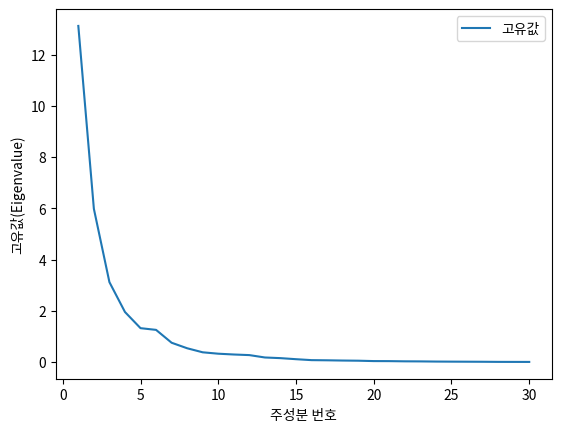

In [10]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

#### 주성분 분석을 그래프로 확인해주었습니다. 보통 급격하게 꺾이는 구간을 확인하여 그 값을 상황에 따라 지정하여 축소하여줍니다.

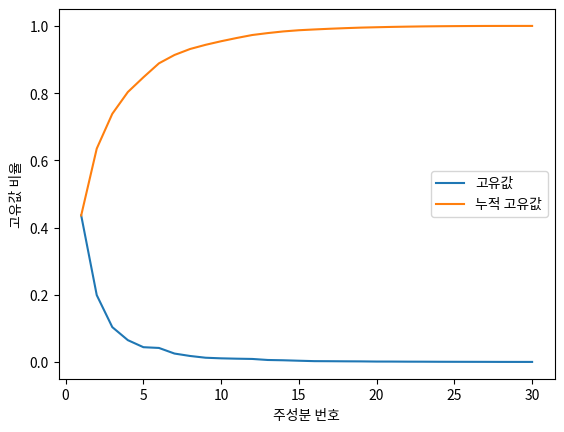

In [11]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label="고유값")
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

#### 아까 그래프에서 누적된 고유값까지 추가하여 그래프로 봐주었습니다.

In [12]:
x_cols=pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector=pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, columns=["Prin" + str(i) for i in range(1, 31)])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,mean_radius,-0.214,0.238,0.026,0.026,-0.007,-0.068,0.156,-0.097,-0.196,...,0.166,0.074,-0.078,0.131,0.070,-0.082,0.168,-0.180,-0.218,0.706
1,mean_texture,-0.110,0.046,0.038,-0.604,0.042,0.101,-0.030,0.138,0.097,...,-0.251,0.109,-0.136,-0.183,-0.070,-0.017,0.040,-0.002,0.006,0.002
2,mean_perimeter,-0.225,0.218,0.024,0.029,-0.010,-0.068,0.147,-0.106,-0.182,...,0.113,0.072,-0.027,0.048,0.095,-0.072,0.168,-0.087,-0.376,-0.689
3,mean_area,-0.213,0.245,-0.002,0.040,-0.010,-0.035,0.082,-0.048,-0.229,...,-0.032,-0.035,0.137,0.060,-0.114,0.142,-0.543,0.259,0.438,-0.042
4,mean_smoothness,-0.151,-0.194,0.058,0.201,-0.037,0.474,0.074,-0.196,-0.012,...,0.076,0.107,0.058,-0.064,0.008,-0.057,-0.069,-0.009,0.003,-0.007
5,mean_compactness,-0.240,-0.163,0.046,0.053,-0.024,-0.040,-0.025,-0.136,0.011,...,-0.184,0.053,-0.350,-0.201,0.202,0.266,-0.169,0.008,0.050,0.051
6,mean_concavity,-0.261,-0.046,0.003,0.046,-0.060,-0.019,0.107,-0.057,0.024,...,-0.259,-0.314,0.112,0.046,0.039,-0.637,-0.129,-0.056,0.011,0.021
7,mean_concave_points,-0.260,0.039,0.035,0.086,-0.008,0.067,0.154,-0.191,-0.009,...,0.092,-0.325,0.099,0.065,-0.168,0.527,0.291,0.029,0.004,0.003
8,mean_symmetry,-0.147,-0.197,0.047,0.138,0.428,0.061,0.054,-0.219,0.176,...,0.100,-0.003,0.064,0.021,-0.024,-0.026,0.008,-0.007,0.009,-0.001
9,mean_fractal_dimension,-0.076,-0.351,-0.000,0.080,-0.056,0.104,-0.290,-0.176,-0.104,...,0.116,0.181,0.092,0.247,-0.011,-0.079,0.125,0.008,-0.008,-0.003


#### 고유값을 직관적으로 보기 위해서 표로 만들었고, 어떠한 연관성이 있는지 확인해줄 수 있었습니다.

In [13]:
df_merged = pd.concat([df_pca, df_raw["diagnosis"]], axis=1)

In [14]:
df_merged

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30,diagnosis
0,-2.003897,-0.258058,-1.848903,-1.314675,0.624726,0.789452,0.132109,-1.014080,0.497473,-0.511154,...,0.164854,0.066377,0.180670,-0.001146,0.008636,-0.068607,0.000605,0.025802,0.014159,음성
1,-5.849067,0.211648,-0.168087,-2.956419,1.830544,-0.405165,0.323011,-0.526610,0.411091,0.133668,...,0.168014,-0.064889,-0.043477,0.014914,-0.043391,-0.049777,0.012085,0.014942,0.003802,양성
2,-1.549048,-2.925664,-2.442463,-0.465868,0.090423,1.032349,-0.579689,-0.055718,0.212289,0.057031,...,-0.296615,-0.089094,-0.111252,-0.078950,-0.050892,0.067030,0.030987,0.012601,-0.003082,음성
3,-3.112491,-1.321534,-1.219585,-1.443804,0.699558,1.987331,0.290574,0.059442,-0.230053,0.116894,...,-0.103717,0.066354,0.105339,-0.013316,-0.011097,-0.021080,0.033756,-0.021498,0.005064,양성
4,-5.824799,-1.678924,0.057293,-1.501697,0.845648,2.025902,0.248052,-0.420780,0.225568,0.175480,...,0.129423,-0.003367,0.020147,-0.045760,0.052844,-0.065091,0.017130,0.021292,-0.001706,양성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,3.203038,-0.265636,4.051026,1.690832,0.115799,-0.134136,-2.134139,1.577557,-0.806868,-1.202820,...,0.214326,-0.090862,0.097209,0.132012,0.030356,-0.103970,-0.024059,-0.056874,-0.012532,음성
316,3.421096,0.860183,2.742605,2.127877,0.422649,-1.085280,0.273520,3.030544,2.033592,-0.604831,...,-0.338584,-0.554356,0.088626,-0.292044,-0.126926,-0.189966,0.095734,0.010526,0.002299,음성
317,11.009894,1.856835,6.817009,-1.306914,-0.595707,-2.643071,-1.702487,-0.314767,2.678557,2.047106,...,-0.335456,0.573959,0.442660,-0.022420,0.084126,-0.028294,-0.083102,0.036978,-0.000379,음성
318,6.626788,2.463363,5.945138,1.983595,-1.872139,2.265035,1.506391,3.887359,-0.914518,-1.780708,...,-0.002609,-0.409990,0.275980,-0.001399,-0.130352,-0.115218,0.180062,-0.032861,0.014489,음성


In [15]:
sns.pairplot(df_merged, hue='diagnosis')

KeyboardInterrupt: 

#### 산점도 행렬을 목표변수별로 확인해주었습니다.

In [ ]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
Prin1,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
Prin3,-0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
Prin4,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
Prin5,-0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
Prin6,-0.0,0.0,0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
Prin7,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
Prin8,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,0.0,...,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
Prin9,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
Prin10,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,...,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0


#### 마지막으로 주성분 변수는 서로 독립, 상관계수, 공분산 0인 것을 확인해주었고, 자기 자신의 값들만 1을 나타내는 것을 확인해주었습니다. 제철소 기준 변수가 160개정도 된다면 PCA 분석을 사용한다는 것을 알 수 있었고, 변수를 줄임으로서 경제성을 확보할 수 있을 것으로 생각됩니다. 또한 목표변수가 범주형이므로 회귀분석은 하지 않습니다.

In [ ]:
df_merged_small= df_merged.loc[:,["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"]]
df_merged_small = pd.concat([df_merged_small, df_raw["diagnosis"]], axis=1)
df_merged_small

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,diagnosis
0,-2.003897,-0.258058,-1.848903,-1.314675,0.624726,0.789452,음성
1,-5.849067,0.211648,-0.168087,-2.956419,1.830544,-0.405165,양성
2,-1.549048,-2.925664,-2.442463,-0.465868,0.090423,1.032349,음성
3,-3.112491,-1.321534,-1.219585,-1.443804,0.699558,1.987331,양성
4,-5.824799,-1.678924,0.057293,-1.501697,0.845648,2.025902,양성
...,...,...,...,...,...,...,...
315,3.203038,-0.265636,4.051026,1.690832,0.115799,-0.134136,음성
316,3.421096,0.860183,2.742605,2.127877,0.422649,-1.085280,음성
317,11.009894,1.856835,6.817009,-1.306914,-0.595707,-2.643071,음성
318,6.626788,2.463363,5.945138,1.983595,-1.872139,2.265035,음성


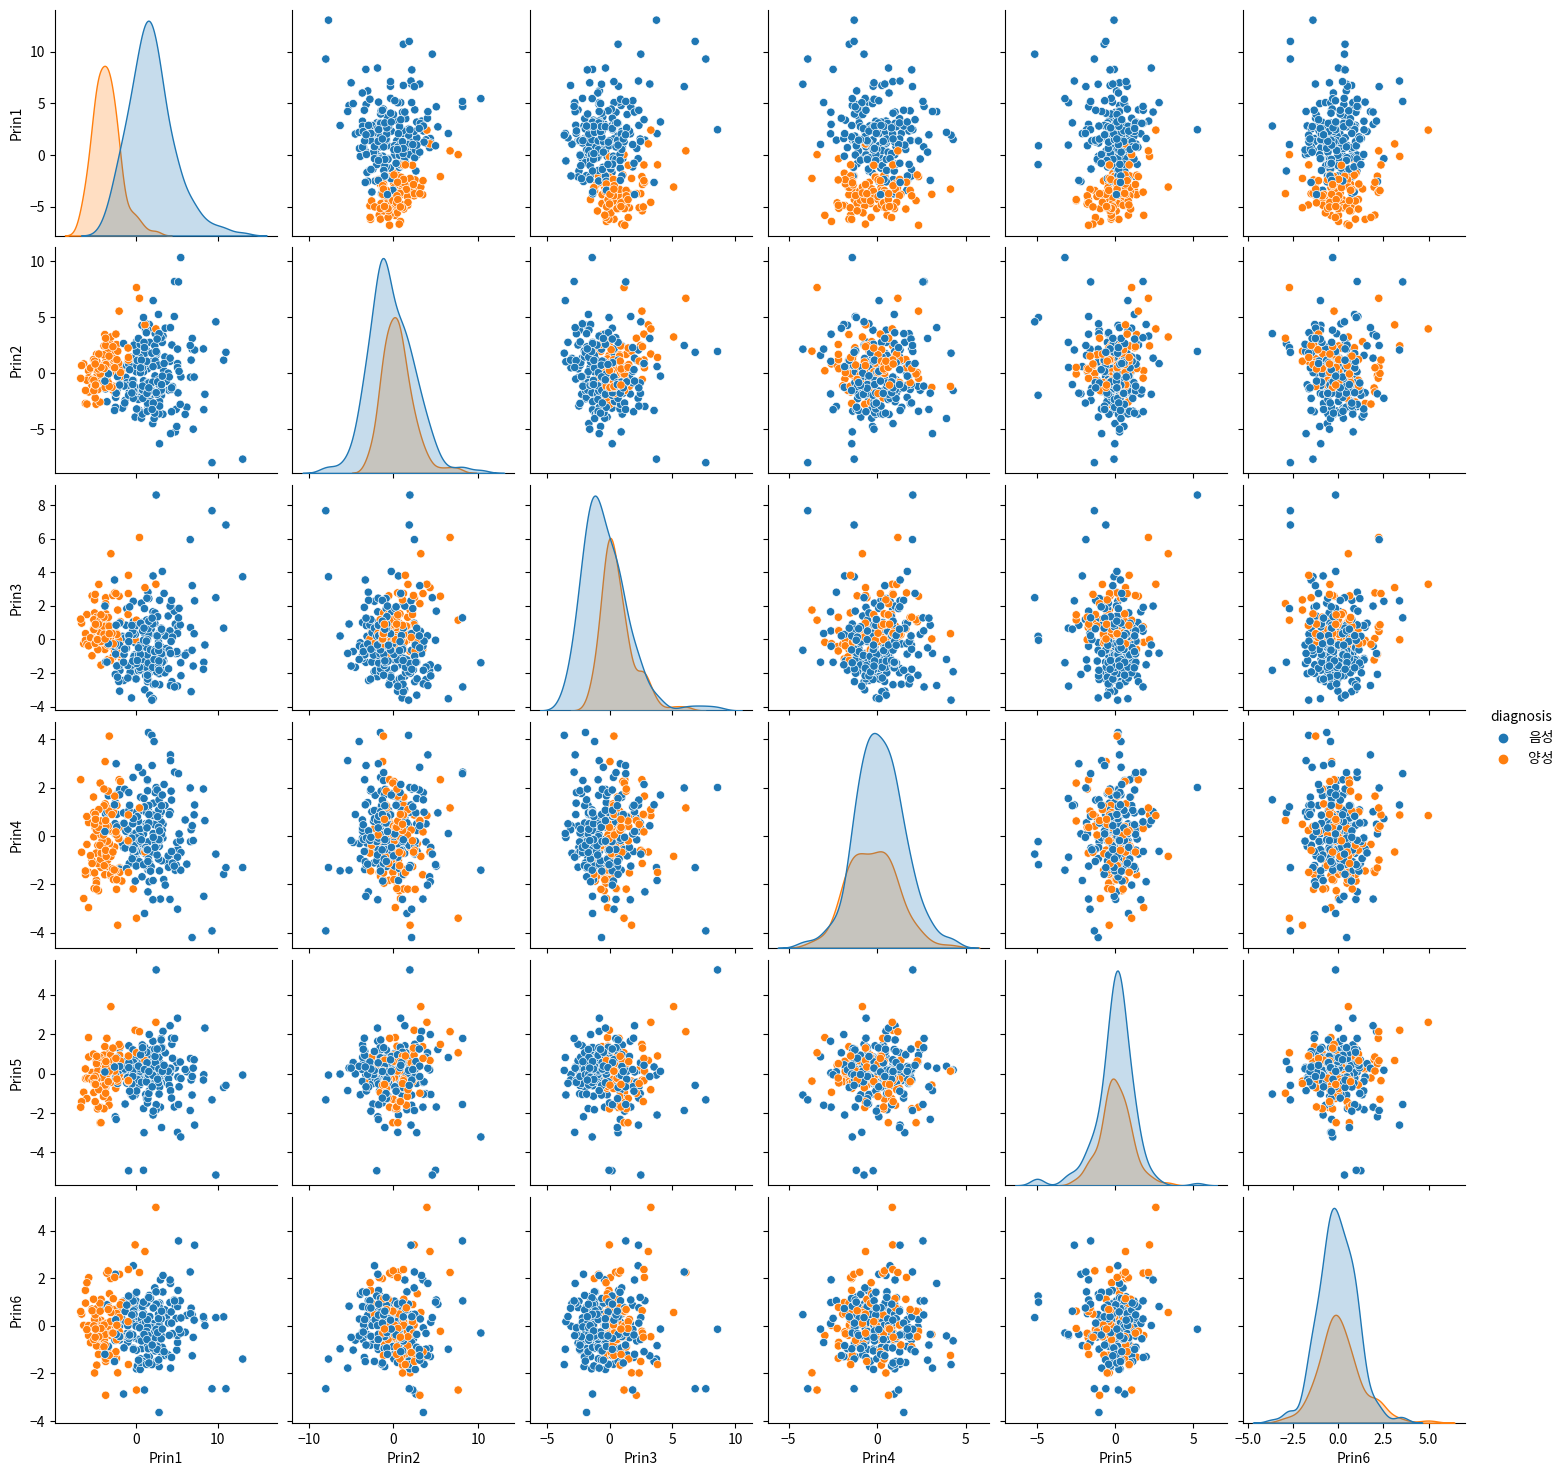

In [ ]:
sns.pairplot(df_merged_small, hue='diagnosis')

#### 주성분 분석으로 설명력이 90%이상인 것까지 보았을 때 Prin6 까지로 차원을 축소하고, 차원축소한 것을 산점도 행렬로 목표변수별로 한번더 확인해주었습니다.

#### 주성분 분석으로 설명력이 90%이상인 것까지 보았을 때 Prin6 까지로 차원을 축소하고, 차원축소한 것을 산점도 행렬로 목표변수별로 한번더 확인해주었습니다.